In [ ]:
# CS985MLDAGroup9

# HARSHAN RETHINAVELU SELVAKUMAR - 202480548
# MANOJ KUMAR DHARMARAJ - 202468855
# JHANSI VELURI - 202384615
# PRATHUSHA PUNJARLA - 202351330
# MAISAM BARKAT ALI DOHTA - 202359049


In [19]:
import numpy as np   #numpy library is imported and an alias ‘np’ is assigned to the library
import pandas as pd  # pandas library is imported and an alias ‘pd’ is assigned to the library


import os                                               # os library is imported
for dirname, _, filenames in os.walk('/kaggle/input'):  # Initialization of a loop that iterates over the directory and the file mentioned
    for filename in filenames:                          # Iterates over each and every filename in the directory
        print(os.path.join(dirname, filename))          # Prints the full path of each file


/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTest.csv
/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTrain.csv


In [20]:
spotify_tr = pd.read_csv("/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTrain.csv")  # Reads ‘CS98XRegressionTrain.csv’ file from the directory to pandas dataframe named ‘spotify_tr’
spotify_tr    # Displays the dataframe

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


In [11]:
spotify_te = pd.read_csv("/kaggle/input/cs9856-spotify-regression-problem-2024/CS98XRegressionTest.csv") # Reads ‘CS98XRegressionTest.csv’ file from the directory to pandas dataframe named ‘spotify_te’
spotify_te.head(2) # Displays the first two rows of the dataframe

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3


In [21]:
spotify_tr = spotify_tr.dropna()  # Removes the rows with missing values and assigns the result back to ‘spotify_tr’

In [22]:
spotify_tr.columns   # Displays the list of columns in the dataframe

Index(['Id', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
       'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [23]:
columns = ['bpm','nrgy','dnce','dB','live','val','dur','acous','spch','pop']   # Displays the list of columns to be selected from the dataframe ‘spotify_tr’
spotify_tr = spotify_tr[columns]   # Assigns only the selected columns in the list ‘Columns’ to the dataframe ‘spotify_tr’
spotify_tr.head()   # Displays the first five rows of the dataframe

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,107,31,45,-8,13,28,150,75,3,44
2,105,36,63,-9,13,67,245,11,3,77
3,170,28,47,-16,13,33,232,25,3,67
4,121,47,56,-8,15,40,193,45,3,63
5,110,56,71,-7,12,23,223,15,6,74


In [24]:
spotify_tr.shape  # Returns a tuple consisting of the number of rows and columns in the dataframe

(438, 10)

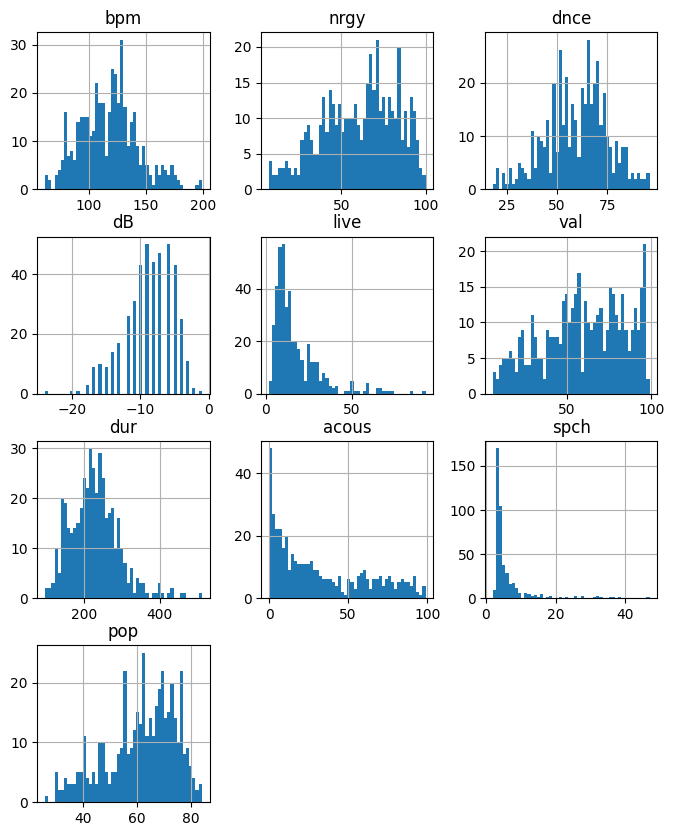

In [26]:
import matplotlib.pyplot as plt    # matplotlib.pyplot is imported and given an alias ‘plt’
%matplotlib inline  
spotify_tr.hist(bins=50,figsize=(8,10)) # Generates histograms for numerical attributes in the dataframe. ‘bins’ defines the intervals to be used and ‘figsize’ defines the size of the histogram
plt.show()   # Displays the generated histograms

In [27]:
x = spotify_tr.drop('pop',axis=1) # Creates a new dataframe ‘x’ where the column ‘pop’ is dropped and all other columns of the dataframe ‘spotify.tr’ are stored
y = spotify_tr['pop']  # Creates a new dataframe ‘y’ where the column ‘pop’ is stored
x   # Displays the dataframe ‘x’

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,107,31,45,-8,13,28,150,75,3
2,105,36,63,-9,13,67,245,11,3
3,170,28,47,-16,13,33,232,25,3
4,121,47,56,-8,15,40,193,45,3
5,110,56,71,-7,12,23,223,15,6
...,...,...,...,...,...,...,...,...,...
448,80,22,18,-17,10,16,214,92,4
449,148,81,53,-13,23,96,147,50,3
450,168,55,73,-8,20,61,289,23,14
451,165,87,64,-5,6,88,191,5,8


In [28]:
y    # Displays the dataframe ‘y’

0      44
2      77
3      67
4      63
5      74
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop, Length: 438, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split    # Imports train_test_split function of ‘model_selection’ module from the ‘scikit-learn’ library
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)    # ‘train_test_split’  function splits ‘x’ and ‘y’ into training and testing sets where ‘x’ is the the feature and ‘y’ is the target variable. test_size = 0.2 means that 20% of data will be used for testing and the remaining 80% data will be used for training. random_state will produce the same results everytime when running the code
print(x_train.shape)   # Displays a tuple consisting of the number of rows and columns in the training set
print(x_test.shape)    # Displays a tuple consisting of the number of rows and columns in the testing set

(350, 9)
(88, 9)


In [30]:
from sklearn.preprocessing import StandardScaler    # Imports StandardScaler from the preprocessing module of scikit-learn library
scaler = StandardScaler()   # Creates an instance of StandardScaler class
scaler.fit(x_train)   # Calculates the mean and standard deviation of each feature in the training data ‘x_train’ after fitting the scaler to the fitting data
x_train_scaled = scaler.transform(x_train)  # Transforms the training data ‘x_train’ using the fitted scaler
x_test_scaled = scaler.transform(x_test)    # Transforms the testing data ‘x_test’ using the fitted scaler
x_test_scaled = pd.DataFrame(x_test_scaled, columns=['bpm','nrgy','dnce','dB','live','val','dur','acous','spch'])  # Converts the scaled test data into pandas dataframe and columns are assigned to it
x_test_scaled

x_train_scaled = pd.DataFrame(x_train_scaled, columns=['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']) # Converts the scaled training data into pandas dataframe and columns are assigned to it
x_train_scaled  # Displays the dataframe

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,0.523661,0.539952,-0.655430,0.773540,0.977251,1.175234,-1.307662,0.181903,-0.111088
1,-0.777325,-0.940685,0.331947,-0.870624,0.610494,-0.644087,-0.647064,0.181903,-0.287820
2,-1.605225,-0.895818,-0.852906,-0.322569,-0.343075,-1.925881,0.351889,1.028524,-0.464552
3,0.247694,1.392440,0.331947,1.321594,0.243736,1.009841,0.222992,-0.326070,-0.111088
4,-0.422511,1.123233,0.463597,0.773540,0.170385,0.306922,2.059777,-1.037232,-0.464552
...,...,...,...,...,...,...,...,...,...
345,0.089999,-1.613702,0.595247,-1.966732,-0.783184,-1.719140,0.464674,0.588281,-0.464552
346,0.168847,1.571911,-1.247857,0.773540,-0.563129,-0.023864,0.835254,-1.138826,0.065643
347,-0.383087,-0.940685,-0.852906,-0.322569,-0.123021,-0.354649,-1.629905,1.638091,-0.464552
348,0.405389,0.315613,0.858548,0.225485,0.903899,1.547368,0.222992,-0.326070,-0.287820


In [31]:
from sklearn.linear_model import LinearRegression  # Imports LinearRegression from the linear_model  module of scikit-learn library
lin_model = LinearRegression()   # Creates an instance of LinearRegression class
lin_model.fit(x_train_scaled,y_train)   # Fits the Linear Regression model to the ‘x_train_scaled’ and ‘y_train’ where ‘x_train_scaled’ is the scaled training data and ‘y_train’ is the target variable

LinearRegression()

In [32]:
lin_model.intercept_  # Gives the y-intercept of the regression line

60.48285714285714

In [33]:
y_preds = lin_model.predict(x_test_scaled)  # The trained linear model ‘lin_model’  is applied to the scaled test data ‘x_test_scaled’ to make predictions for the target variable
y_preds  # Displays the predicted values of the target variable

array([71.29547707, 69.7845524 , 66.8328784 , 59.50104117, 60.23981745,
       58.77475102, 64.40914852, 66.68978224, 74.1684818 , 63.20342286,
       60.01834558, 66.70411854, 63.1645799 , 72.55509398, 62.2799904 ,
       66.84494661, 55.91212988, 58.8808163 , 57.7318369 , 70.52580966,
       71.78017772, 56.49859335, 64.74742966, 67.7316139 , 59.86863871,
       67.63770349, 69.49316391, 77.15162238, 51.64551074, 64.91868346,
       69.3017442 , 63.89893284, 63.55487131, 48.67010685, 74.08130523,
       47.5055527 , 61.62277876, 61.71478734, 62.47665313, 60.35567329,
       64.40908016, 50.43599084, 59.66241431, 62.47614233, 57.98852497,
       66.00571587, 53.17404324, 64.3331116 , 69.81109551, 65.79764881,
       62.15550271, 62.53559575, 71.32662367, 61.06535861, 58.84020343,
       66.83588512, 69.25414661, 43.53977348, 57.76719143, 63.3788817 ,
       45.653209  , 56.95589291, 50.30509446, 50.71205526, 54.92694044,
       68.13016852, 47.61450136, 67.62813372, 57.49603272, 53.47

In [34]:
from sklearn.metrics import mean_squared_error   # Imports mean_squared_error from the metrics  module of scikit-learn library
lin_rmse = mean_squared_error(y_test, y_preds, squared=False)   # Calculates RMSE between ‘y_test’ and ‘y_preds’. (RMSE = √MSE)
lin_rmse   # Displays the RMSE Value

10.905634132063183

In [35]:
len(y_preds)  # Displays the length of ‘y_preds’

88

In [36]:
from sklearn.ensemble import RandomForestRegressor  # Imports RandomForestRegressor from ensemble module of scikit-learn library
rfr_model = RandomForestRegressor(random_state=1)  # Creates an instance of the RandomForestRegressor class
rfr_model.fit(x_train_scaled, y_train)  # Trains the Random forest regression model ‘rfr_model’ using scaled training data ‘x_train_scaled’ and target values ‘y_train’

RandomForestRegressor(random_state=1)

In [37]:
rfr_pred = rfr_model.predict(x_test_scaled)  # Make predictions on the scaled test data ‘x_test_scaled’ using trained Random forest regression model ‘rfr_model’
rfr_pred

array([65.42, 67.83, 70.24, 66.14, 64.23, 56.4 , 65.41, 65.32, 69.01,
       68.34, 62.42, 63.28, 66.53, 63.  , 59.01, 66.82, 53.16, 57.01,
       67.63, 65.82, 62.92, 56.58, 65.99, 61.65, 55.15, 62.62, 69.58,
       66.33, 51.28, 68.4 , 69.23, 60.55, 59.13, 54.79, 67.78, 46.89,
       64.13, 64.84, 67.31, 65.97, 64.09, 49.42, 65.68, 59.34, 67.48,
       67.22, 59.86, 63.82, 70.34, 63.78, 69.41, 67.39, 66.9 , 68.13,
       67.31, 68.74, 71.21, 40.4 , 62.25, 61.24, 46.96, 50.18, 44.97,
       53.89, 52.96, 68.9 , 50.19, 66.11, 61.62, 46.86, 57.56, 65.58,
       66.63, 62.15, 49.09, 50.26, 69.52, 69.42, 64.57, 68.97, 61.48,
       61.49, 57.99, 62.18, 69.02, 49.6 , 57.65, 44.02])

In [38]:
rfr_mse = mean_squared_error(y_test,rfr_pred)  # Calculates the mean squared error between ‘y_test’ and ‘rfr_pred’
rfr_rmse = np.sqrt(rfr_mse)  # RMSE = √MSE
rfr_rmse  # Displays the RMSE value

10.814271032045824

In [40]:
spotify_test_scaled = scaler.transform(spotify_te[['bpm','nrgy','dnce','dB','live','val','dur','acous','spch']])  # Transforms the test data using the fitted scaler
spotify_test_scaled = pd.DataFrame(spotify_test_scaled, columns=['bpm','nrgy','dnce','dB','live','val','dur','acous','spch'])  # Converts the scaled test data to pandas dataframe and column names are assigned to it
spotify_test_scaled
y_preds_csv = rfr_model.predict(spotify_test_scaled)    # The trained Random Forest Regressor model is applied to ‘spotify_test_scaled’ to make predictions

In [41]:
y_preds_csv  # Displays the predicted values

array([67.02, 61.08, 52.37, 60.46, 50.17, 64.81, 54.52, 42.31, 62.69,
       59.93, 62.44, 65.91, 58.68, 60.3 , 61.64, 64.11, 62.06, 64.4 ,
       67.31, 65.22, 51.79, 59.94, 60.69, 45.48, 53.54, 68.23, 59.57,
       57.09, 48.72, 66.93, 68.53, 53.63, 66.81, 68.03, 64.56, 68.46,
       63.94, 50.76, 65.41, 65.96, 64.34, 63.34, 63.58, 44.11, 64.08,
       60.82, 65.99, 60.03, 58.16, 63.04, 48.34, 66.09, 61.4 , 50.7 ,
       62.21, 64.23, 63.31, 51.1 , 69.2 , 42.1 , 64.55, 66.19, 68.12,
       66.49, 68.71, 65.65, 65.83, 55.16, 62.55, 60.33, 65.24, 54.34,
       56.79, 61.98, 59.39, 67.04, 68.7 , 67.67, 56.07, 52.76, 67.99,
       62.41, 47.19, 68.24, 49.11, 61.66, 64.04, 67.18, 43.32, 71.32,
       40.98, 61.87, 68.3 , 68.67, 67.05, 68.76, 60.73, 58.23, 65.77,
       48.86, 56.26, 60.95, 68.97, 55.15, 47.2 , 66.2 , 66.61, 64.6 ,
       56.42, 66.54, 60.85, 60.76, 63.35, 62.69])

In [42]:
submission = pd.DataFrame({'Id': spotify_te.iloc[:,0], 'pop': y_preds_csv })  # Creates a dataframe named ‘submission’ consisting of two columns. The first column is the ‘Id’ which contains the Ids from test data and it is taken from the first column of ‘spotify_te’. The second column consists of the predicted popularity values ‘y_preds_csv’
submission.to_csv('submission.csv', index=False)  # Saves the ‘submission’ dataframe to CSV file named ‘submission.csv’